# EN ESTA NOTEBOOK SE IMPLEMENTARÁ UNA REGRESION LINEAL QUE CLASIFIQUE Y SE EVALUARÁN LOS RESULTADOS PARA EL PROYECTO


In [28]:
#importamos librerías

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, confusion_matrix 


In [13]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [14]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

print (df.iloc[:,-3:]) 

       dijeron_diabetes  veces_presion_alta  colesterol_alto
0                     2                   3                2
1                     2                   3                1
2                     2                   3                2
3                     2                   3                1
4                     2                   3                2
...                 ...                 ...              ...
25632                 2                   3                2
25633                 2                   2                1
25634                 2                   2                1
25635                 1                   3                2
25636                 1                   2                2

[25637 rows x 3 columns]


In [15]:
# Lista de las regiones que se encuentran en el dataset

regiones = df['region'].unique()
print(regiones)

[1 2 3 4 5 6]


In [16]:
# Crear un diccionario para almacenar los DataFrames por región

dfs_por_region = {}

In [17]:
# Iterar sobre cada región y guardar un nuevo DF por cada una

for region in regiones:
    # Filtrar los datos por la región actual
    df_region = df[df['region'] == region]
    # Guardar el DataFrame en el diccionario usando la región como clave
    dfs_por_region[region] = df_region

In [19]:

#funcion para calcular metricas por cada región y para cada enfermedad

def metricas(y_pred, y_test, enfermedad, region_actual):
        global resultados_por_region
        exactitud = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        sensibilidad = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion = confusion_matrix(y_test, y_pred)

        # Inicializar las claves si no existen
        if enfermedad not in resultados_por_region:
            resultados_por_region[enfermedad] = {}
        if region_actual not in resultados_por_region[enfermedad]:
            resultados_por_region[enfermedad][region_actual] = {}
        
        
        resultados_por_region[enfermedad][region_actual]={
            'exactitud':exactitud,
            'precision':precision,
            'sensibilidad':sensibilidad,
            'f1': f1,
            'confusion': confusion
        }
        
        
        

In [20]:
# Crear diccionarios para almacenar modelos y resultados por región
modelos_por_region = {}
resultados_por_region = {}
importancia_por_region = {}



# Iterar sobre cada región para entrenar y evaluar modelos
for region in regiones:
    # Obtener el DataFrame de la región actual
    df_region = dfs_por_region[region]
    
    # Variables independientes
    X_region = df_region.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
    
    # Variables dependientes
    y_region_colesterol = df_region['colesterol_alto']
    y_region_diabetes = df_region['dijeron_diabetes']
    y_region_hipertension = df_region['veces_presion_alta']

    
    #ESCALAR VARIABLES PARA UNIFICAR PESOS EN REGRESION LINEAL
    scaler = StandardScaler()
    X_region_escalada = scaler.fit_transform(X_region)
    
    
    
    
    # Dividir los datos en conjuntos de entrenamiento y prueba para cada enfermedad
    X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_region_escalada, y_region_colesterol, test_size=0.25, random_state=0)
    X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_region_escalada, y_region_diabetes, test_size=0.25, random_state=0)
    X_train_hip, X_test_hip, y_train_hip, y_test_hip = train_test_split(X_region_escalada, y_region_hipertension, test_size=0.25, random_state=0)
    
    # Crear y entrenar el modelo para cada enfermedad
    clf_col = LogisticRegression(random_state=0, max_iter=1000)
    clf_col.fit(X_train_col, y_train_col)
    
    
   
    clf_dia = LogisticRegression(random_state=0, max_iter=1000)
    clf_dia.fit(X_train_dia, y_train_dia)
   
    
    
    clf_hip = LogisticRegression(random_state=0, max_iter=1000)
    clf_hip.fit(X_train_hip, y_train_hip)
    

  
    # Almacenar los modelos y sus resultados por región
    modelos_por_region[region] = {
        'colesterol': clf_col,
        'diabetes': clf_dia,
        'hipertension': clf_hip
    }

         
    #obtener los coeficienter de las caracteristicas
    coef_col = clf_col.coef_[0]
    coef_dia = clf_dia.coef_[0]
    coef_hip = clf_hip.coef_[0]
    
    
    #almacenamos la importancia de cada caracteristica
    importancia_por_region[region]={
        'colesterol': coef_col,
        'diabetes': coef_dia,
        'hipertension': coef_hip  
    }
      
        
    # Probar modelo con conjunto de prueba
    y_pred_col = clf_col.predict(X_test_col)
    y_pred_dia = clf_dia.predict(X_test_dia)
    y_pred_hip = clf_hip.predict(X_test_hip)
    
   
    
    
    ## METRICAS DE EVALUACIÓN   ##############33
    metricas(y_pred_col, y_test_col, 'colesterol', region)
    metricas(y_pred_dia, y_test_dia, 'diabetes', region)
    metricas(y_pred_hip, y_test_hip, 'hipertension', region)
    
    
print("finalizado")

finalizado


  ## CÁLCULOS DE EXACTITUD, PRECISIÓN, SENSIBILIDAD, F1-Score Y MATRIZ DE CONFUSIÓN POR CADA ENFERMEDAD Y POR CADA REGIÓN 

In [21]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}


In [22]:
# Mostrar los resultados por enfermedad y por región

for enfermedad, regiones in resultados_por_region.items():
    for region, resultados in regiones.items():

        nombre_region = resultados_por_region.get(region, f"Región {region}")
        print(f"Enfermedad: {enfermedad}")
        print(f"Región: {nombre_region}")
        print(f"Exactitud del modelo: {resultados['exactitud']:.4f}")
        print(f"Precision del modelo: {resultados['precision']:.4f}")
        print(f"Sensibilidad del modelo: {resultados['sensibilidad']:.4f}")
        print(f"f1 del modelo: {resultados['f1']:.4f}")
        print(f"Matriz de confusion del modelo: \n{resultados['confusion']}\n")

        
        

Enfermedad: colesterol
Región: Región 1
Exactitud del modelo: 0.7272
Precision del modelo: 0.6734
Sensibilidad del modelo: 0.7272
f1 del modelo: 0.6713
Matriz de confusion del modelo: 
[[ 31 184]
 [ 37 558]]

Enfermedad: colesterol
Región: Región 2
Exactitud del modelo: 0.7871
Precision del modelo: 0.7231
Sensibilidad del modelo: 0.7871
f1 del modelo: 0.7177
Matriz de confusion del modelo: 
[[  27  407]
 [  34 1603]]

Enfermedad: colesterol
Región: Región 3
Exactitud del modelo: 0.7854
Precision del modelo: 0.7339
Sensibilidad del modelo: 0.7854
f1 del modelo: 0.7362
Matriz de confusion del modelo: 
[[ 33 211]
 [ 39 882]]

Enfermedad: colesterol
Región: Región 4
Exactitud del modelo: 0.8080
Precision del modelo: 0.7635
Sensibilidad del modelo: 0.8080
f1 del modelo: 0.7551
Matriz de confusion del modelo: 
[[ 20 151]
 [ 18 691]]

Enfermedad: colesterol
Región: Región 5
Exactitud del modelo: 0.7148
Precision del modelo: 0.6563
Sensibilidad del modelo: 0.7148
f1 del modelo: 0.6629
Matriz d

## Conclusiones de análisis de los modelos:

<u>RESPECTO A COLESTEROL<u>
    
Las metricas son similares o un poco mejor a las obtenidad en el algoritmo de arboles de decision mejorado con GridSearch. 
Las regiones 1 y 5 (metropolitana y cuyo) son las que tienen peor desempeño, tal vez relacionado con el hecho de que son las de menor número de filas.
    
<u>RESPECTO A DIABETES<u>
    
La mayoria de las regiones tienen metricas por encima de 0.8 lo que se considera un buen desempeño. Similar a lo que sucedía en arboles de decisión

<u>RESPECTO A HIPERTENSIÓN<u>
    
Los resultados no son tan buenos como las metricas de diabetes, sin embargo la precisión, exactitud, etc.. es mejor que en los arboles de decisión con hiperparámetros optimizados

 ## CALCULOS DE LA IMPORTANCIA DE CADA CARACTERÍSTICA ANALIZADA (VARIABLES INDEPENDIENTES) EN EL MODELO QUE PERMITE DETERMINAR LA EXISTENCIA O NO DE LAS ENFERMEDADES CONSIDERADAS (COLESTEROL, DIABETES E HIPERTENSIÓN) 

### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DEL COLESTEROL SEPARADAS POR REGIÓN

In [34]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_colesterol_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_col = importancias['colesterol']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_col)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_col[i] > 0.14:  # solo imprimo columnas con importancia mayor a cierto valor
                                 
            print(f"{columnas_originales[i]}: {importances_col[i]:.4f}")
            
            importancias_colesterol_df = importancias_colesterol_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_col[i]     
            }, ignore_index=True)
            
    print("\n")    
    
    

Región: Metropolitana
profesional_indica_sobrepeso: 1.6870
nivel_actividad_fisica: 0.2432
edad_fumo_primera_vez: 0.2316
altura_cm: 0.1895
af_moderada_min_totales_por_semana: 0.1547
situacion_conyugal: 0.1493
caminata_veces_por_semana: 0.1426


Región: Pampeana
profesional_indica_sobrepeso: 0.3150
altura_cm: 0.2785


Región: Noroeste
profesional_indica_sobrepeso: 2.9892
consumido_alcohol: 0.5613
cobertura_salud_nueva: 0.1707


Región: Noreste
alguna_vez_fumo: 0.2664
af_intensa_veces_por_semana: 0.2225
altura_cm: 0.2075
edad_fumo_primera_vez: 0.2018
actividad_fisica_moderada_min_totales_por_semana_nsnc: 0.1916
familiares_directos_diabetes: 0.1852


Región: Cuyo
profesional_indica_sobrepeso: 2.2394
af_intensa_min_totales_por_semana: 0.3317
altura_cm: 0.2602
actividad_fisica_moderada_min_totales_por_semana_nsnc: 0.2419
obtiene_agua: 0.1893
af_fue_deporte: 0.1473
tamanio_aglomerado: 0.1447


Región: Patagónica
profesional_indica_sobrepeso: 2.1724
actividad_fisica_moderada_min_totales_por_se

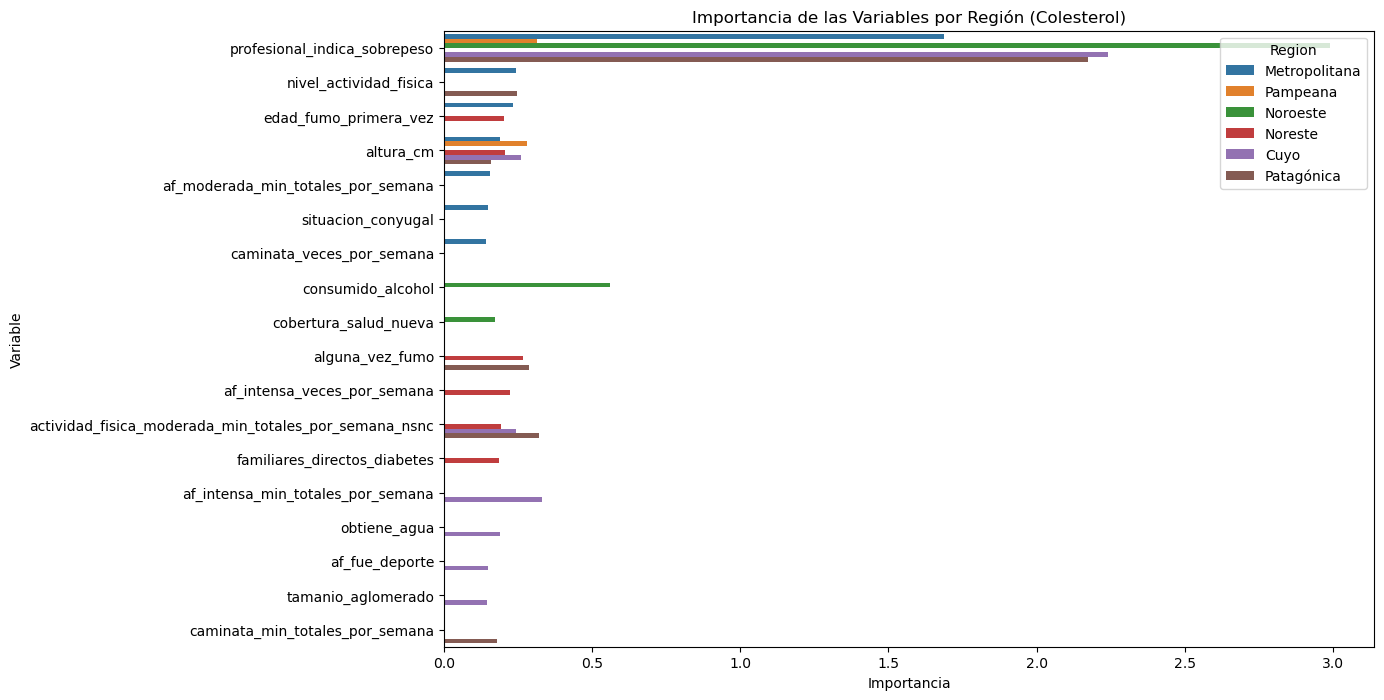

In [35]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_colesterol_df)
plt.title('Importancia de las Variables por Región (Colesterol)')
plt.show()

### Conclusiones: 

1. A partir del gráfico se puede inferir que hay más características importantes y además son más variadas entre zonas.
2. Se observa que el sobrepeso es común a todas las variables. 
3. No aparece la variable EDAD, tal vez sea un problema del ESCALADO?



### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DE LA HIPERTENSIÓN SEPARADAS POR REGIÓN

In [36]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_hipertension_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_hip = importancias['hipertension']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_hip)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_hip[i] > 0.1:  # solo imprimo columnas con importancia mayor a 0
                    
            print(f"{columnas_originales[i]}: {importances_hip[i]:.4f}")
            
            importancias_hipertension_df = importancias_hipertension_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_hip[i]     
            }, ignore_index=True)
            
    print("\n") 


Región: Metropolitana
edad_fumo_primera_vez: 0.3011
af_intensa_veces_por_semana: 0.2401
altura_cm: 0.1488
actividad_fisica_moderada_min_totales_por_semana_nsnc: 0.1472
alguna_vez_fumo: 0.1279
situacion_conyugal: 0.1264
nivel_actividad_fisica: 0.1151
caminata_min_totales_por_semana_nsnc: 0.1083
af_fue_actividad_domestica: 0.1055


Región: Pampeana
altura_cm: 0.2028


Región: Noroeste
profesional_indica_sobrepeso: 1.6570
af_intensa_min_totales_por_semana_nsnc: 0.1342
situacion_conyugal: 0.1172
af_fue_traslado: 0.1120


Región: Noreste
altura_cm: 0.1654
asignaciones: 0.1362
obtiene_agua: 0.1320


Región: Cuyo
profesional_indica_sobrepeso: 1.4728
nivel_instruccion: 0.1254
obtiene_agua: 0.1228
edad_fumo_primera_vez: 0.1195
cant_componentes: 0.1042
af_intensa_min_totales_por_semana_nsnc: 0.1030


Región: Patagónica
af_fue_actividad_domestica: 0.2337
nivel_instruccion: 0.1454
altura_cm: 0.1388
familiares_directos_diabetes: 0.1277
edad_fumo_primera_vez: 0.1255




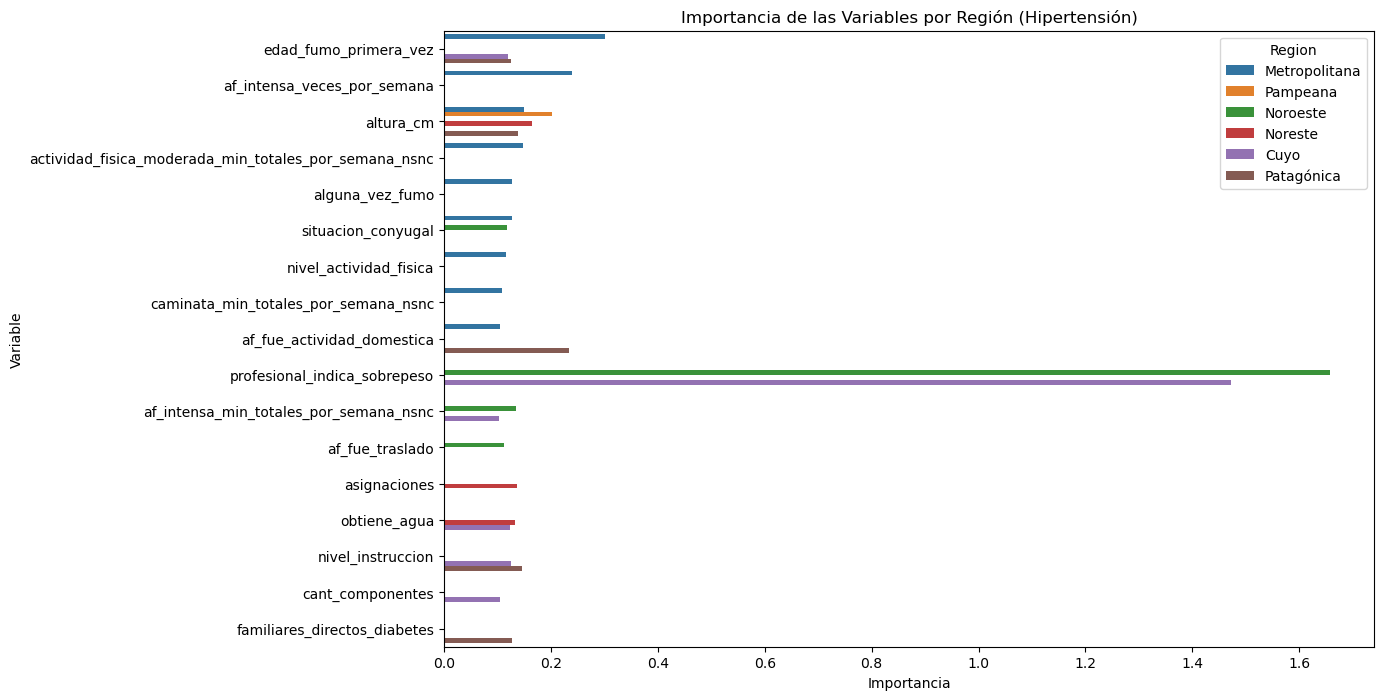

In [37]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_hipertension_df)
plt.title('Importancia de las Variables por Región (Hipertensión)')
plt.show()

### Conclusiones causas Hipertensión
1. Nuevamente aparecen mayor cantidad de variables con importancia y más variadas
2. El sobrepeso es muy importante en noroeste y cuyo pero no en otras regiones
3. actividad fisica, nivel actividad, caminata, etc.. aparecen como acarcterístucas importantes en varias regiones pero con distintos nombres  (aunque hacen referencia a valores similares) 
4. En avrias regiones aparece como importante la altura. Se debería verificar que no es un problema de escalado

### CARACTERÍSTICAS MÁS IMPORTANTES EN LA DETERMINACIÓN DE LA DIABETES SEPARADAS POR REGIÓN

In [39]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_diabetes_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])

for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_dia = importancias['diabetes']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_dia)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
   
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_dia[i] > 0.15:  # solo imprimo columnas con importancia mayor a 0
            print(f"{columnas_originales[i]}: {importances_dia[i]:.4f}")
            
            importancias_diabetes_df = importancias_diabetes_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_dia[i]     
            }, ignore_index=True)
    print("\n")


Región: Metropolitana
profesional_indica_sobrepeso: 1.7938
No_sabe_edad_fumo_primera_vez: 0.2105
af_moderada_min_totales_por_semana: 0.1891
af_intensa_veces_por_semana: 0.1835
caminata_min_totales_por_semana: 0.1784
nivel_instruccion: 0.1710
altura_cm: 0.1567


Región: Pampeana
profesional_indica_sobrepeso: 1.9939
altura_cm: 0.2139
af_intensa_veces_por_semana: 0.1657
af_moderada_min_totales_por_semana: 0.1554


Región: Noroeste
profesional_indica_sobrepeso: 2.8232
af_intensa_min_totales_por_semana: 0.3531
edad_fumo_primera_vez: 0.2378
nivel_instruccion: 0.1821
cant_componentes: 0.1616
situacion_conyugal: 0.1540


Región: Noreste
edad_fumo_primera_vez: 0.3161
altura_cm: 0.1869
af_intensa_min_totales_por_semana: 0.1634


Región: Cuyo
profesional_indica_sobrepeso: 2.1040
af_intensa_min_totales_por_semana: 0.2928
altura_cm: 0.2286
actividad_fisica_moderada_min_totales_por_semana_nsnc: 0.2279
considera_su_alimentacion: 0.1852
asignaciones: 0.1776
sexo: 0.1681
af_fue_actividad_domestica: 0.1

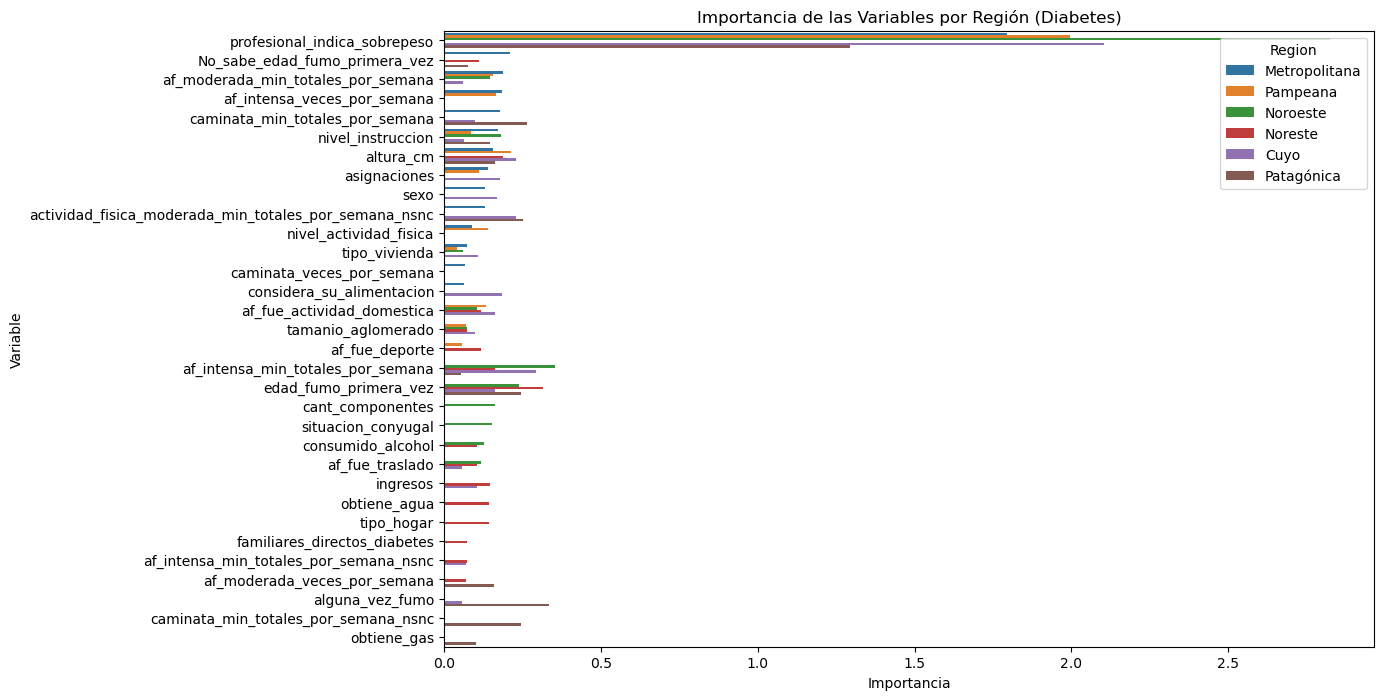

In [33]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_diabetes_df)
plt.title('Importancia de las Variables por Región (Diabetes)')
plt.show()

### Conclusiones causas Diabetes:
1. En este caso vuelve a aprecer la variable sobre peso
2. Valores de variables que indican o relacionados con la actividad física son importantes en varias regiones
3. Se ve una gran cantidad de variables importantes y muy distribuidas. 

# CONCLUSIONES GENERALES

1. En general se observa que la importancia de cada característica está más distribuída, ya que incluso considerando valores mayores a 0.1 siguen apareciendo varias características en todas las regiones y todas las enfermedades
2. Es llamativo que la variable edad no aparece prácticamente.

# APLICAMOS GRIDSEARCH PARA MEJORAR HIPERPARÁMETROS

In [88]:
#importamos librería
from sklearn.model_selection import GridSearchCV

from sklearn.exceptions import ConvergenceWarning
import warnings

In [89]:
#definimos grilla de hiperparámetros

param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Valor de regularización
    'solver': ['liblinear', 'lbfgs'],  # Solvers disponibles
    'max_iter': [100, 200]  # Número máximo de iteraciones
}

In [90]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [92]:
# Crear diccionarios para almacenar modelos y resultados por región
modelos_por_region = {}
resultados_por_region = {}
importancia_por_region = {}


# Crear diccionario para almacenar los resultados de GridSearch
#mejores_modelos_por_region = {}

# Iterar sobre cada región para entrenar y evaluar modelos
for region in regiones:
    # Obtener el DataFrame de la región actual
    df_region = dfs_por_region[region].sample(frac=0.1, random_state=0)  # Usar el 10% de los datos para prueba
    df_region = dfs_por_region[region]
    
    # Variables independientes
    X_region = df_region.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
    
    # Variables dependientes
    y_region_colesterol = df_region['colesterol_alto']
    y_region_diabetes = df_region['dijeron_diabetes']
    y_region_hipertension = df_region['veces_presion_alta']

    
    #ESCALAR VARIABLES PARA UNIFICAR PESOS EN REGRESION LINEAL
    scaler = StandardScaler()
    X_region_escalada = scaler.fit_transform(X_region)
    if np.isnan(X_region_escalada).any() or np.isinf(X_region_escalada).any():
        print(f"Región {region} tiene valores NaN o infinitos después del escalado.")
    
    # Dividir los datos en conjuntos de entrenamiento y prueba para cada enfermedad
    X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_region_escalada, y_region_colesterol, test_size=0.25, random_state=0)
    X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_region_escalada, y_region_diabetes, test_size=0.25, random_state=0)
    X_train_hip, X_test_hip, y_train_hip, y_test_hip = train_test_split(X_region_escalada, y_region_hipertension, test_size=0.25, random_state=0)
    
    
    #Definimos el modelo a utilizar
    modelo = LogisticRegression(random_state=0)
    
    # Crear y entrenar el modelo para cada enfermedad
    grid_search_col = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=3)
    grid_search_col.fit(X_train_col, y_train_col)
    mejor_modelo_col = grid_search_col.best_estimator_
    
   
    grid_search_dia = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=3)
    grid_search_dia.fit(X_train_dia, y_train_dia)
    mejor_modelo_dia = grid_search_dia.best_estimator_
    
    
    grid_search_hip = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=3)
    grid_search_hip.fit(X_train_hip, y_train_hip)
    mejor_modelo_hip = grid_search_hip.best_estimator_
    
    
    
    # Almacenar los mejores modelos y sus parámetros
#    mejores_modelos_por_region[region] = {
#        'colesterol': grid_search_col.best_estimator_,
#        'diabetes': grid_search_dia.best_estimator_,
#        'hipertension': grid_search_hip.best_estimator_,
#        'parametros_colesterol': grid_search_col.best_params_,
#        'parametros_diabetes': grid_search_dia.best_params_,
#        'parametros_hipertension': grid_search_hip.best_params_
#    }
  
    # Almacenar los modelos y sus resultados por región
    modelos_por_region[region] = {
        'colesterol': mejor_modelo_col,
        'diabetes': mejor_modelo_dia,
        'hipertension': importances_hip
    }


    # Imprimir los mejores parámetros encontrados
  #  print(f"Región: {region}")
  #  print(f"Mejores parámetros para colesterol: {grid_search_col.best_params_}")
  #  print(f"Mejores parámetros para diabetes: {mejor_modelo_dia.best_params_}")
  #  print(f"Mejores parámetros para hipertension: {grid_search_hip.best_params_}")


    
     
    #obtener los coeficienter de las caracteristicas
    coef_col = mejor_modelo_col.coef_[0]
    coef_dia = mejor_modelo_dia.coef_[0]
    coef_hip = mejor_modelo_hip.coef_[0]
    
    
    #almacenamos la importancia de cada caracteristica
    importancia_por_region[region]={
        'colesterol': coef_col,
        'diabetes': coef_dia,
        'hipertension': coef_hip  
    }
      
         
    
    
    # Evaluar modelos con el conjunto de prueba
    y_pred_col = grid_search_col.predict(X_test_col)
    y_pred_dia = grid_search_dia.predict(X_test_dia)
    y_pred_hip = grid_search_hip.predict(X_test_hip)
    
    
    ## METRICAS DE EVALUACIÓN   ##############33
    metricas(y_pred_col, y_test_col, 'colesterol', region)
    metricas(y_pred_dia, y_test_dia, 'diabetes', region)
    metricas(y_pred_hip, y_test_hip, 'hipertension', region)
    
    
print("finalizado")




Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
finalizado


C:\Users\diana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [93]:
# Mostrar los resultados por enfermedad y por región

for enfermedad, regiones in resultados_por_region.items():
    for region, resultados in regiones.items():

        nombre_region = resultados_por_region.get(region, f"Región {region}")
        print(f"Enfermedad: {enfermedad}")
        print(f"Región: {nombre_region}")
        print(f"Exactitud del modelo: {resultados['exactitud']:.4f}")
        print(f"Precision del modelo: {resultados['precision']:.4f}")
        print(f"Sensibilidad del modelo: {resultados['sensibilidad']:.4f}")
        print(f"f1 del modelo: {resultados['f1']:.4f}")
        print(f"Matriz de confusion del modelo: \n{resultados['confusion']}\n")


Enfermedad: colesterol
Región: Región 1
Exactitud del modelo: 0.7272
Precision del modelo: 0.6734
Sensibilidad del modelo: 0.7272
f1 del modelo: 0.6713
Matriz de confusion del modelo: 
[[ 31 184]
 [ 37 558]]

Enfermedad: colesterol
Región: Región 2
Exactitud del modelo: 0.7866
Precision del modelo: 0.7216
Sensibilidad del modelo: 0.7866
f1 del modelo: 0.7174
Matriz de confusion del modelo: 
[[  27  407]
 [  35 1602]]

Enfermedad: colesterol
Región: Región 3
Exactitud del modelo: 0.7837
Precision del modelo: 0.7318
Sensibilidad del modelo: 0.7837
f1 del modelo: 0.7359
Matriz de confusion del modelo: 
[[ 34 210]
 [ 42 879]]

Enfermedad: colesterol
Región: Región 4
Exactitud del modelo: 0.8080
Precision del modelo: 0.7635
Sensibilidad del modelo: 0.8080
f1 del modelo: 0.7551
Matriz de confusion del modelo: 
[[ 20 151]
 [ 18 691]]

Enfermedad: colesterol
Región: Región 5
Exactitud del modelo: 0.7199
Precision del modelo: 0.6686
Sensibilidad del modelo: 0.7199
f1 del modelo: 0.6730
Matriz d

## COnclusiones



## Parametros más importantes en el modelo con hiperparámetros mejorados para el colesterol

In [64]:
# Crear un DataFrame vacío para almacenar las importancias
importancias_colesterol_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_col = importancias['colesterol']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_col)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_col[i] > 0.04:  # solo imprimo columnas con importancia mayor a 0
                                 
            print(f"{columnas_originales[i]}: {importances_col[i]:.4f}")
            
            importancias_colesterol_df_mejorado = importancias_colesterol_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_col[i]     
            }, ignore_index=True)
            
    print("\n")    
    

Región: Metropolitana
profesional_indica_sobrepeso: 2.1715
nivel_actividad_fisica: 0.2430
edad_fumo_primera_vez: 0.2397
altura_cm: 0.1757
af_moderada_min_totales_por_semana: 0.1545
situacion_conyugal: 0.1488
caminata_veces_por_semana: 0.1412
consumo_5porc_fv: 0.1400
familiares_directos_diabetes: 0.1170
consumo_regular_riesgo: 0.1126
cant_componentes: 0.1102
af_intensa_veces_por_semana: 0.0934
baño: 0.0875
cobertura_salud_nueva: 0.0869
af_intensa_min_totales_por_semana: 0.0816
caminata_min_totales_por_semana_nsnc: 0.0797
caminata_min_totales_por_semana: 0.0716
af_moderada_veces_por_semana: 0.0706
promedio_fv_diario: 0.0546
consumido_alcohol: 0.0532
No_sabe_edad_fumo_primera_vez: 0.0501


Región: Pampeana
profesional_indica_sobrepeso: 0.3366
altura_cm: 0.2786
alguna_vez_fumo: 0.1171
cobertura_salud_nueva: 0.1054
edad_fumo_primera_vez: 0.0867
af_intensa_veces_por_semana: 0.0822
obtiene_gas: 0.0801
tiempo_sentado_min_por_dia_nsnc: 0.0786
nivel_actividad_fisica: 0.0614
caminata_veces_por_se

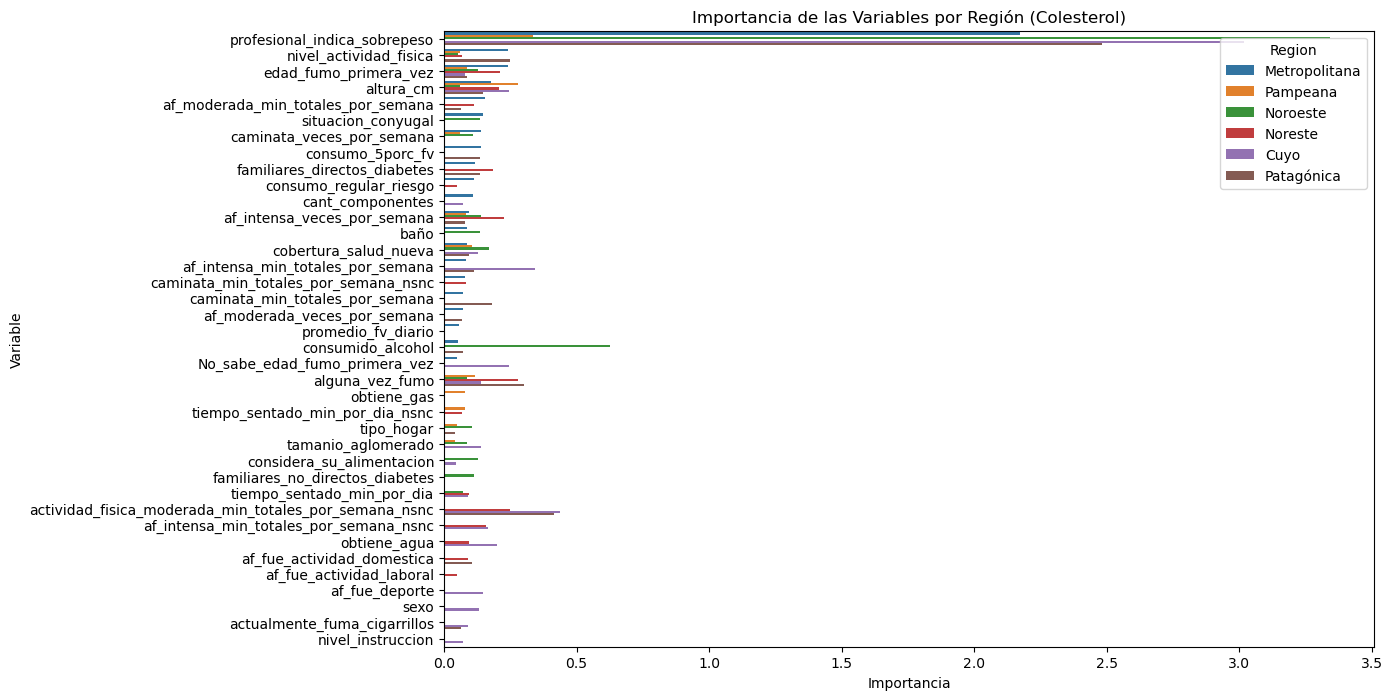

In [65]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_colesterol_df_mejorado)
plt.title('Importancia de las Variables por Región (Colesterol)')
plt.show()

### Conclusiones

## Parametros más importantes en el modelo con hiperparámetros mejorados para la hipertensión


In [66]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_hipertension_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_hip = importancias['hipertension']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_hip)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_hip[i] > 0.04:  # solo imprimo columnas con importancia mayor a 0
                    
            print(f"{columnas_originales[i]}: {importances_hip[i]:.4f}")
            
            importancias_hipertension_df_mejorado = importancias_hipertension_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_hip[i]     
            }, ignore_index=True)
            
    print("\n") 


Región: Metropolitana
af_intensa_veces_por_semana: 0.1196
altura_cm: 0.0999
cobertura_salud_nueva: 0.0929
af_fue_actividad_domestica: 0.0894
situacion_conyugal: 0.0851
edad_fumo_primera_vez: 0.0849
nivel_instruccion: 0.0789
tipo_vivienda: 0.0648
caminata_min_totales_por_semana_nsnc: 0.0563
af_moderada_veces_por_semana: 0.0559
ingresos: 0.0542
tiempo_sentado_min_por_dia: 0.0533
No_sabe_edad_fumo_primera_vez: 0.0470
asignaciones: 0.0432
considera_su_alimentacion: 0.0411


Región: Pampeana
altura_cm: 0.1667
nivel_instruccion: 0.0867
situacion_conyugal: 0.0724
af_fue_actividad_domestica: 0.0538
tipo_vivienda: 0.0510
af_fue_traslado: 0.0402


Región: Noroeste
profesional_indica_sobrepeso: 0.1515
situacion_conyugal: 0.0964
af_fue_actividad_domestica: 0.0822
af_fue_traslado: 0.0741
nivel_instruccion: 0.0637
cobertura_salud_nueva: 0.0631
cant_componentes: 0.0564
caminata_min_totales_por_semana_nsnc: 0.0454
af_intensa_min_totales_por_semana_nsnc: 0.0414


Región: Noreste
altura_cm: 0.1268
asign

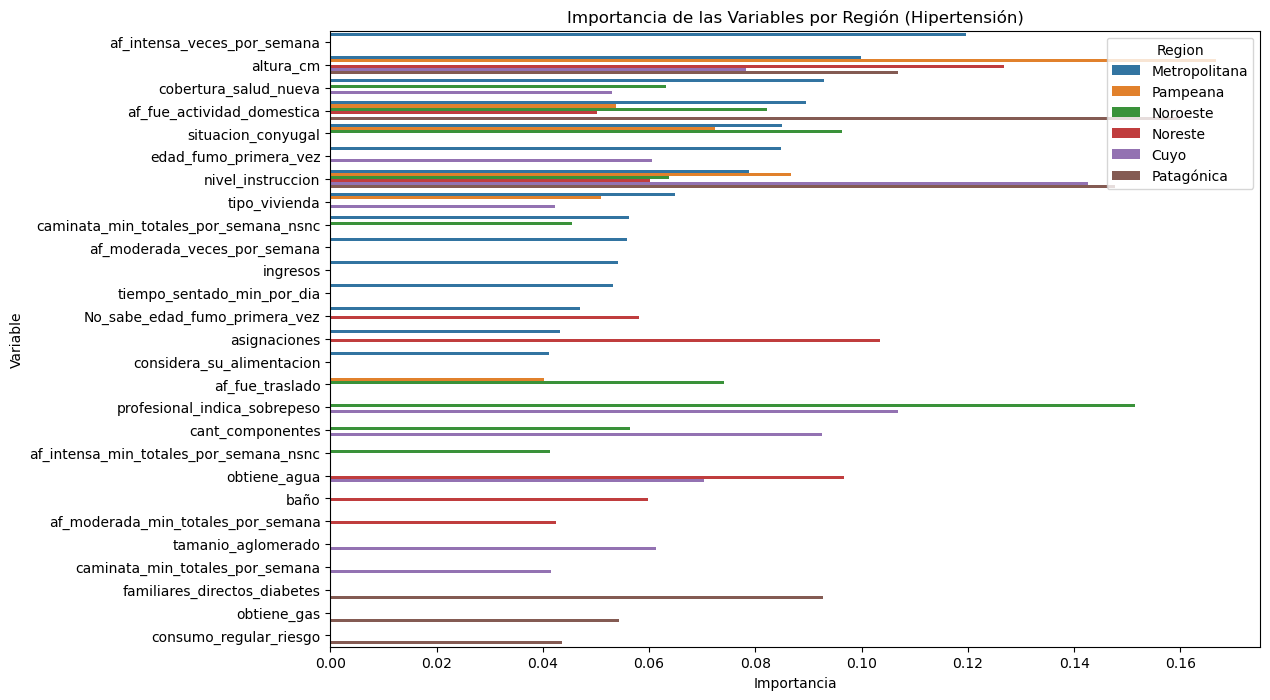

In [67]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_hipertension_df_mejorado)
plt.title('Importancia de las Variables por Región (Hipertensión)')
plt.show()

### Conclusiones


## Parametros más importantes en el modelo con hiperparámetros mejorados para la diabetes

In [68]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_diabetes_df_mejorado = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])

for region, importancias in importancia_por_region.items():
    # Obtener la importancia de diabetes de la región actual
    importances_dia = importancias['diabetes']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_dia)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
   
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_dia[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
            print(f"{columnas_originales[i]}: {importances_dia[i]:.4f}")
            
            importancias_diabetes_df_mejorado = importancias_diabetes_df_mejorado.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_dia[i]     
            }, ignore_index=True)
    print("\n")

Región: Metropolitana
profesional_indica_sobrepeso: 2.6633
No_sabe_edad_fumo_primera_vez: 0.3614
actividad_fisica_moderada_min_totales_por_semana_nsnc: 0.2484
af_moderada_min_totales_por_semana: 0.1918
af_intensa_veces_por_semana: 0.1809
caminata_min_totales_por_semana: 0.1743
nivel_instruccion: 0.1717
sexo: 0.1467
asignaciones: 0.1375
altura_cm: 0.1347
nivel_actividad_fisica: 0.0789
tipo_vivienda: 0.0733
considera_su_alimentacion: 0.0709
caminata_veces_por_semana: 0.0586


Región: Pampeana
profesional_indica_sobrepeso: 1.9828
altura_cm: 0.2136
af_intensa_veces_por_semana: 0.1652
af_moderada_min_totales_por_semana: 0.1548
nivel_actividad_fisica: 0.1393
af_fue_actividad_domestica: 0.1345
asignaciones: 0.1097
nivel_instruccion: 0.0863
tamanio_aglomerado: 0.0683
af_fue_deporte: 0.0576


Región: Noroeste
profesional_indica_sobrepeso: 1.1190
af_intensa_min_totales_por_semana: 0.2423
edad_fumo_primera_vez: 0.1939
nivel_instruccion: 0.1643
cant_componentes: 0.1472
situacion_conyugal: 0.1464
a

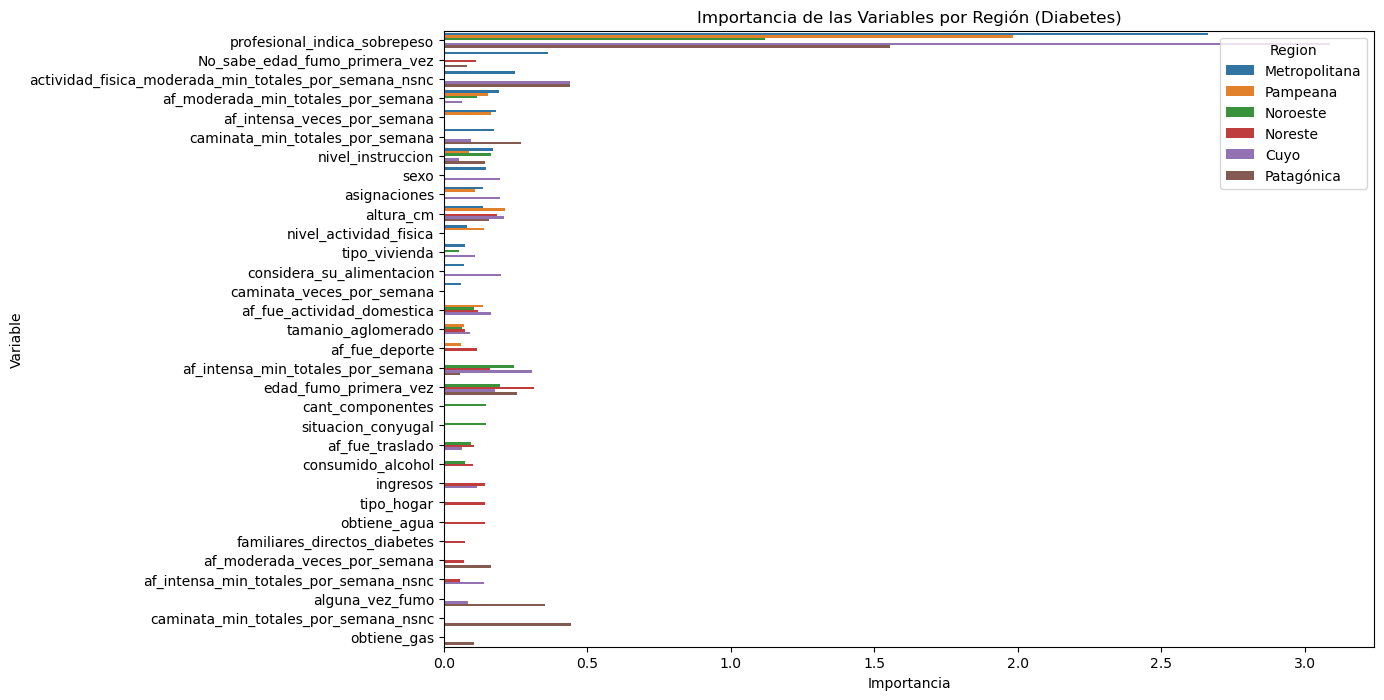

In [69]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_diabetes_df_mejorado)
plt.title('Importancia de las Variables por Región (Diabetes)')
plt.show()

### Conclusiones


# CONCLUSIONES GENERALES